## پرسش چهار

Setting up the dataset

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

data = fetch_california_housing()
X, y = data.data, data.target

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y / np.max(y)  # Scale target to range [0, 1]

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)


# بخش 1 و 2

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the custom RBF Layer
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma=0.1):
        super(RBFLayer, self).__init__()
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_uniform',
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.units,),
                                     initializer=tf.keras.initializers.Constant(1.0),
                                     trainable=True)

    def call(self, inputs):
        C = tf.expand_dims(self.centers, axis=0)  # Expand dimensions for broadcasting
        X = tf.expand_dims(inputs, axis=1)  # Expand dimensions for broadcasting
        distances = tf.reduce_sum((X - C) ** 2, axis=-1)  # Compute squared distances
        return tf.exp(-self.betas * distances)  # Apply the RBF transformation

# Define the RBF Model
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    RBFLayer(units=10, gamma=0.1),    # RBF layer with 10 units
    Dense(1)                          # Output layer with one neuron for regression
])

# Compile the model
rbf_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Train the model
history = rbf_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, verbose=1)

Epoch 1/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 6/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 7/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 8/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 9/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

# بخش 4 و 5


In [7]:
dense_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
dense_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Train Dense model
history_dense = dense_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, verbose=0)

# بخش 6

RBF Model - Test Loss: 0.019346650689840317, Test MSE: 0.019346650689840317
Dense Model - Test Loss: 0.013711906038224697, Test MSE: 0.013711906038224697


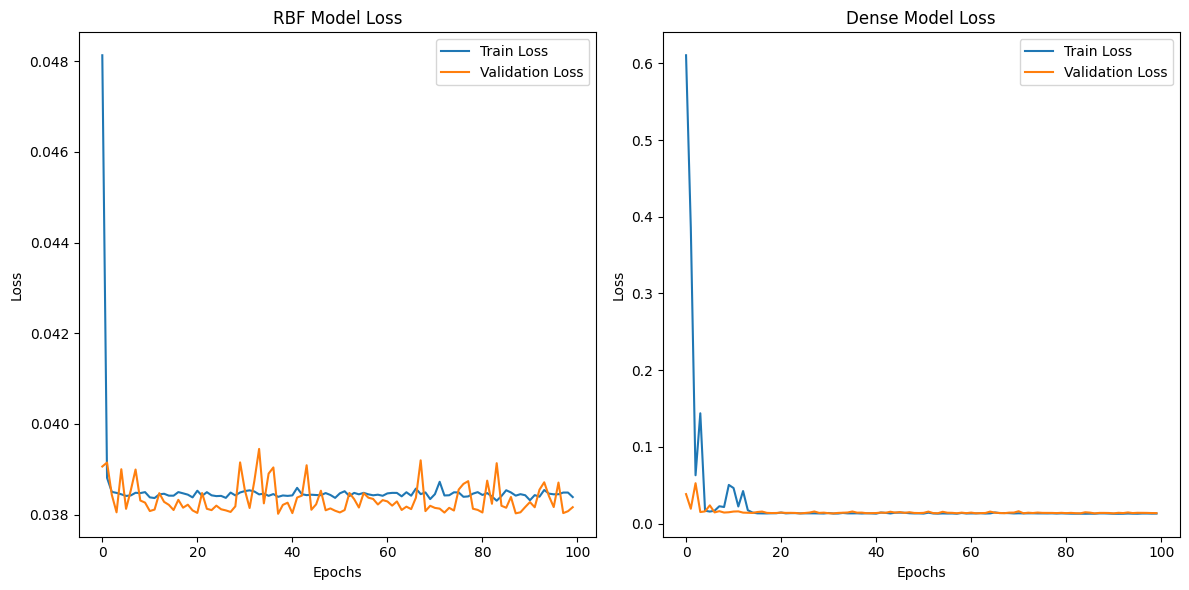

In [13]:
import matplotlib.pyplot as plt

# Evaluate both models on the test set
rbf_test_results = rbf_model.evaluate(X_test, y_test, verbose=0)  # [0] is loss, [1] is MSE
dense_test_results = dense_model.evaluate(X_test, y_test, verbose=0)

rbf_test_loss = rbf_test_results[0]
rbf_test_mse = rbf_test_results[1]
dense_test_loss = dense_test_results[0]
dense_test_mse = dense_test_results[1]

# Display results
print(f"RBF Model - Test Loss: {rbf_test_loss}, Test MSE: {rbf_test_mse}")
print(f"Dense Model - Test Loss: {dense_test_loss}, Test MSE: {dense_test_mse}")

# Visualize training history
plt.figure(figsize=(12, 6))

# RBF model loss
plt.subplot(1, 2, 1)
plt.plot(history_rbf.history['loss'], label='Train Loss')
plt.plot(history_rbf.history['val_loss'], label='Validation Loss')
plt.title('RBF Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Dense model loss
plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.title('Dense Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
